# IMAGE CLASSIFICATION

In the given project we have given 8000 samples of animal pictures and predicted the type of an animal.

For an experimental purpose we have given 4000 Cats pictures and 4000 dogs pictures.

Our main aim is to guess the provided image is cat or a dog.


We will achieve this by using CONVOLUTIONAL NEURAL NETWORK and Deep Learning


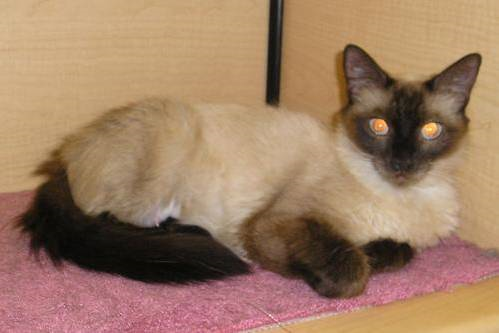

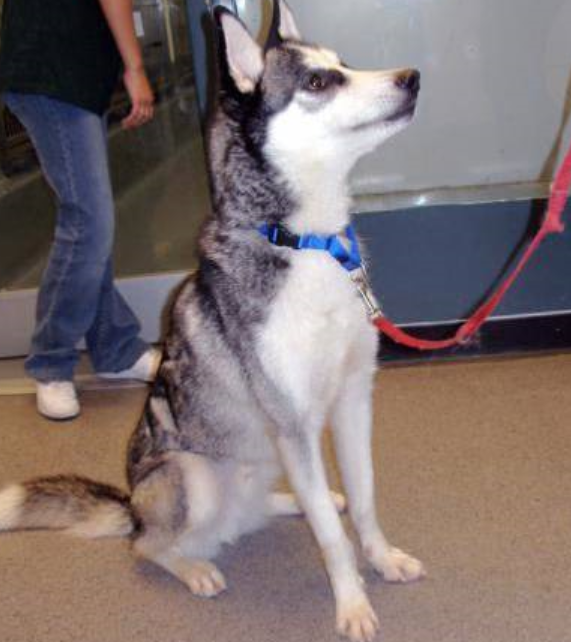

Deep Learning: A subset of Machine Learning Algorithms that is very good at recognizing patterns but typically requires a large number of data.
Deep learning excels in recognizing objects in images as it’s implemented using 3 or more layers of artificial neural networks where each layer is responsible for extracting one or more feature of the image (more on that later).

Neural Network: A computational model that works in a similar way to the neurons in the human brain. 
    Each neuron takes an input, performs some operations then passes the output to the following neuron.

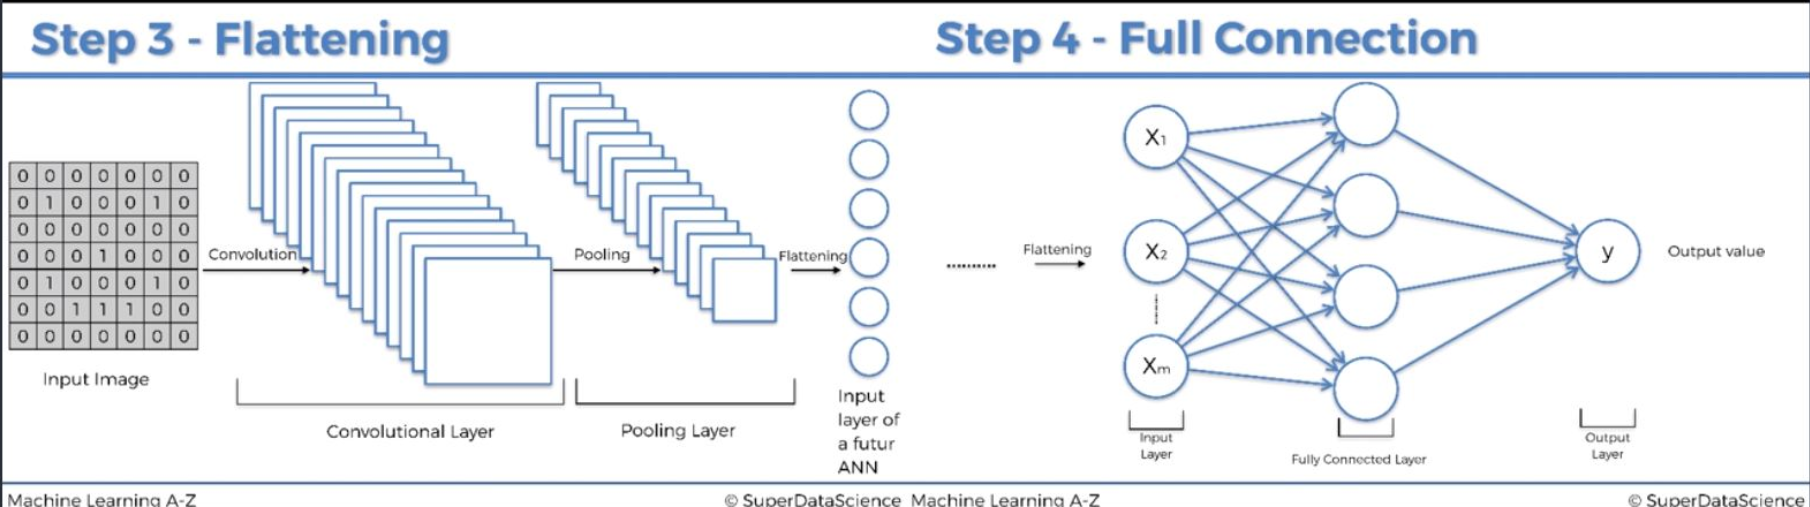

In [1]:
import numpy as np

In [ ]:
from keras.models import Sequential

In [20]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [ ]:
While predicting image we apply the convolution by apply the mathematical convolutional function :

 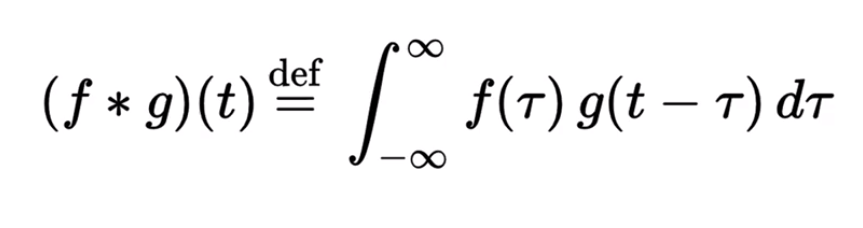

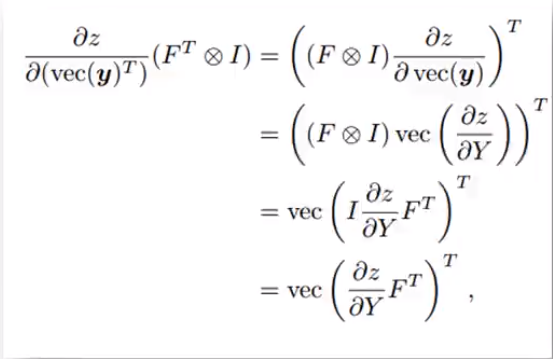

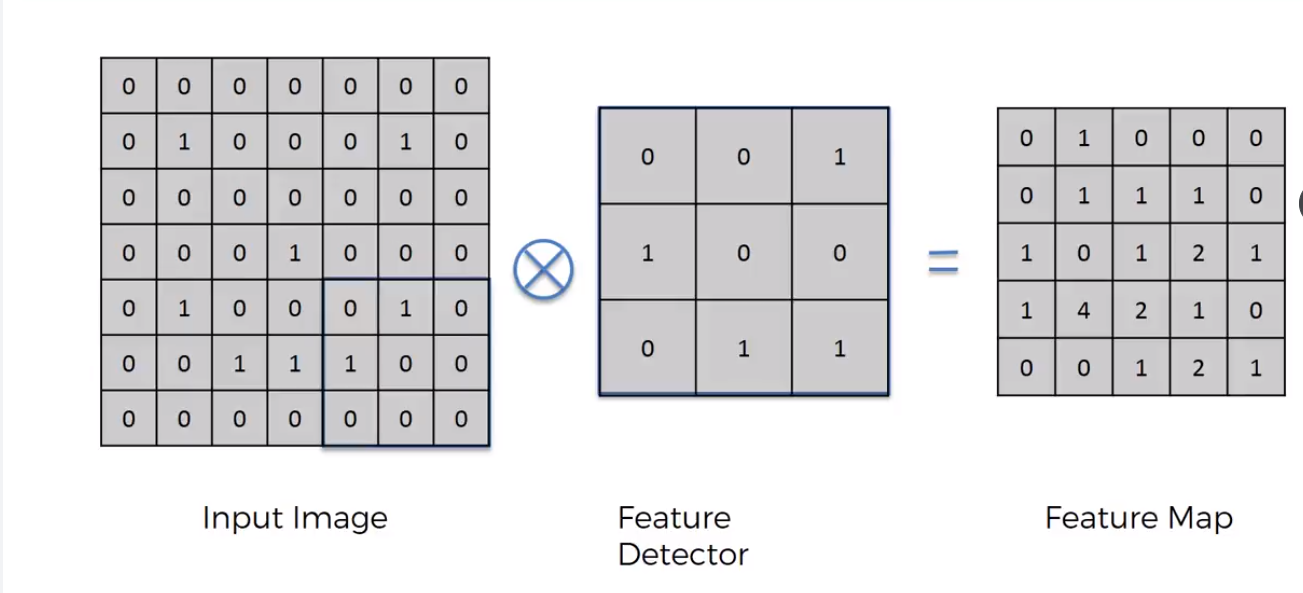

Here feature detector is applied to the whole image .After moving the feature detector all over the image the resultant feature map is calculated. Every feature map captures the specific characteristic of the image.
In that manner there are numerous feature detectors are applied per image and thereby obtaining the numerous feature maps

In [ ]:
The following convolutions can be applied 

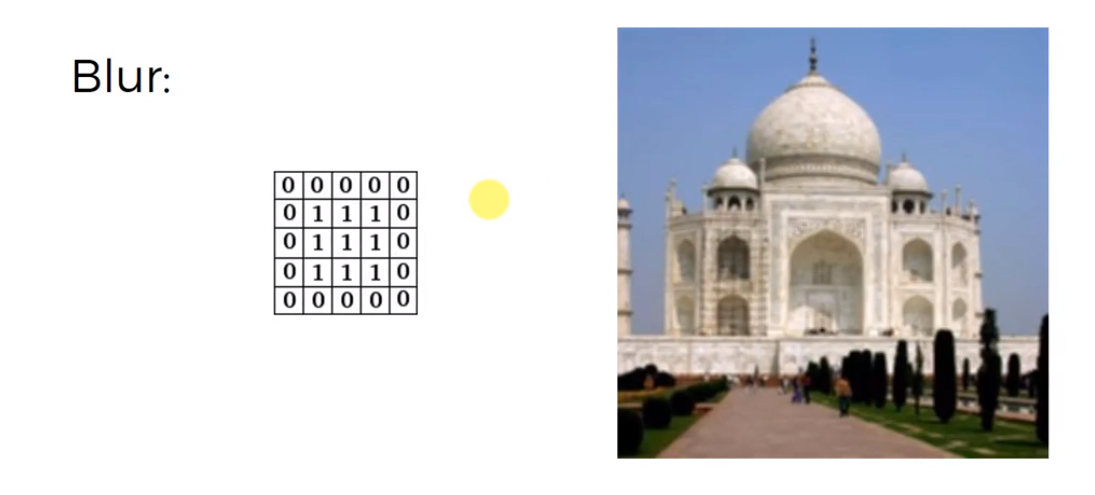

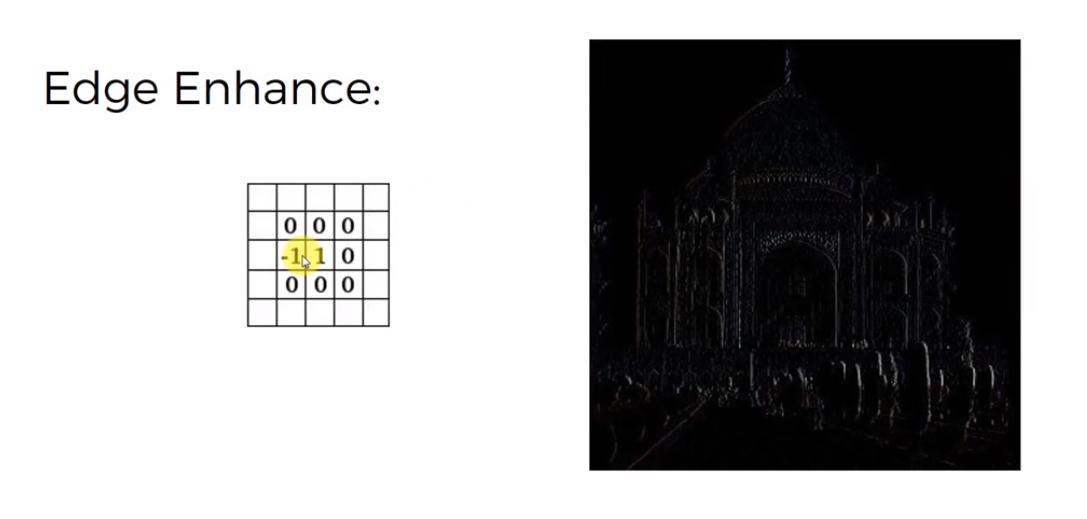

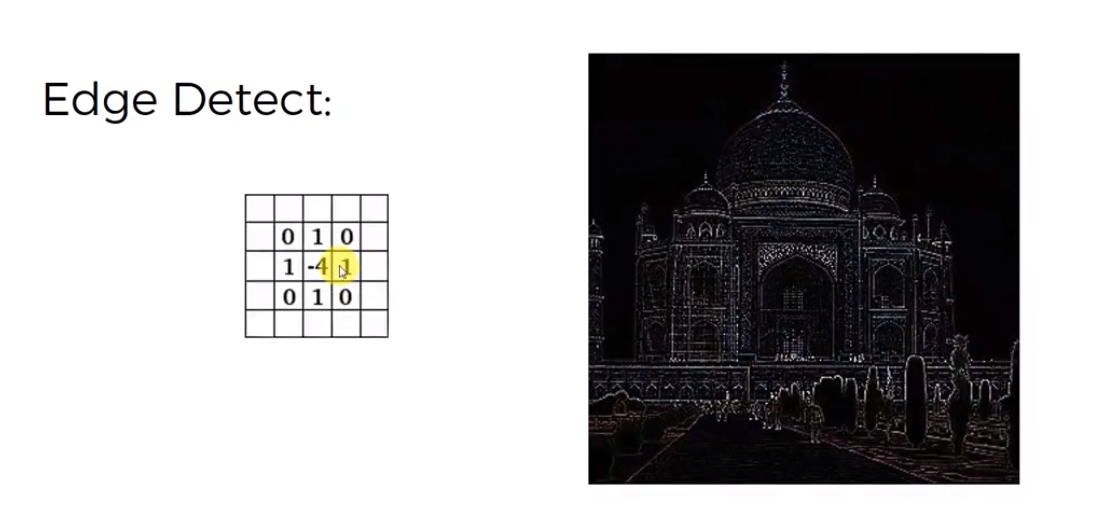

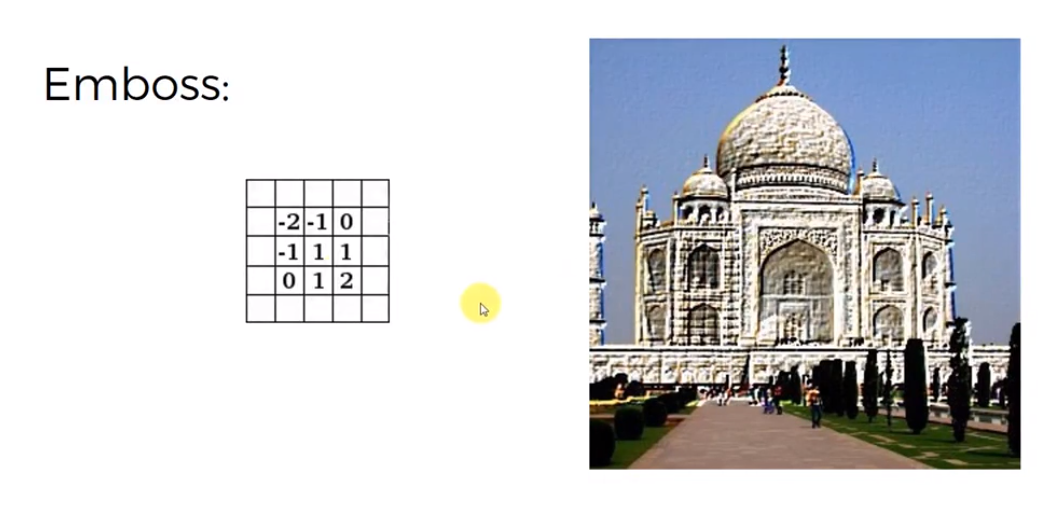

In [21]:
classifier = Sequential()

In [2]:
classifier.add(Convolution2D(32,3,3, input_shape = (64,64,3),activation  = 'relu'))

Here we select the set of 32 feature maps.

I have selected the standarad 3*3 matrix for the better prediction results

The main input image of an animal is considered as 64*64

The activation function used is RELU as we want the negative pixels to be filtered out and the continuous features to be captured

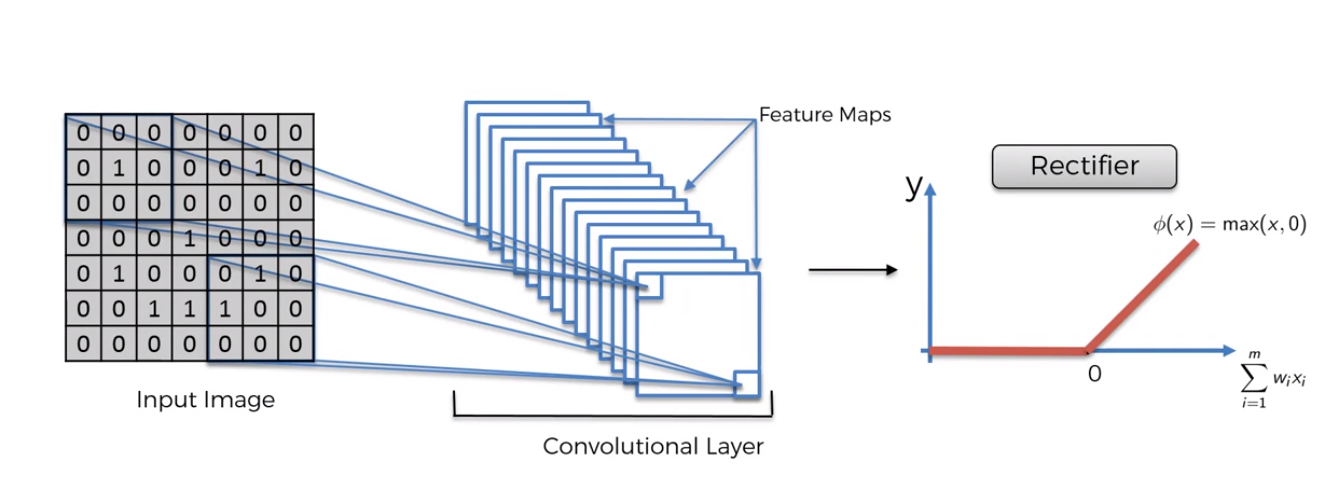

In [23]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

We have selected the pooling matrix of 2*2

In [24]:
classifier.add(Flatten())

In [ ]:
After applying the Max pooling we have to flatten the image in order to provide it to the Neural Network

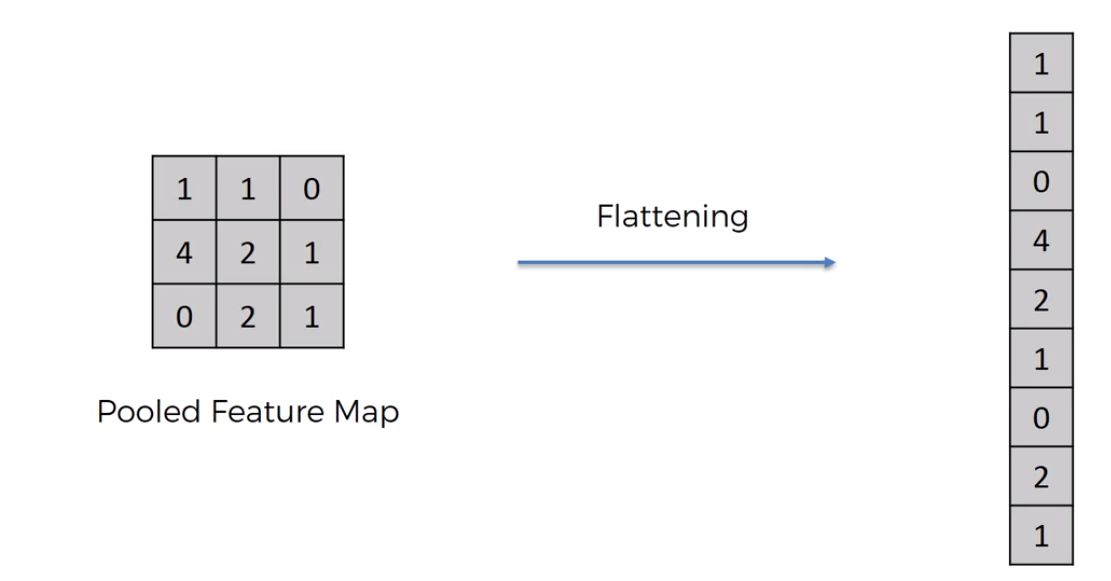

In [3]:
classifier.add(Dense(output_dim = 128, activation = 'relu'))

Here I have 128 input neurons at the first stage which will trigger neurons further to the next stage.

The activation function at the input stage is RELU since I want to filter out the negative pixels

Here we will apply the flattening pixels to the networks


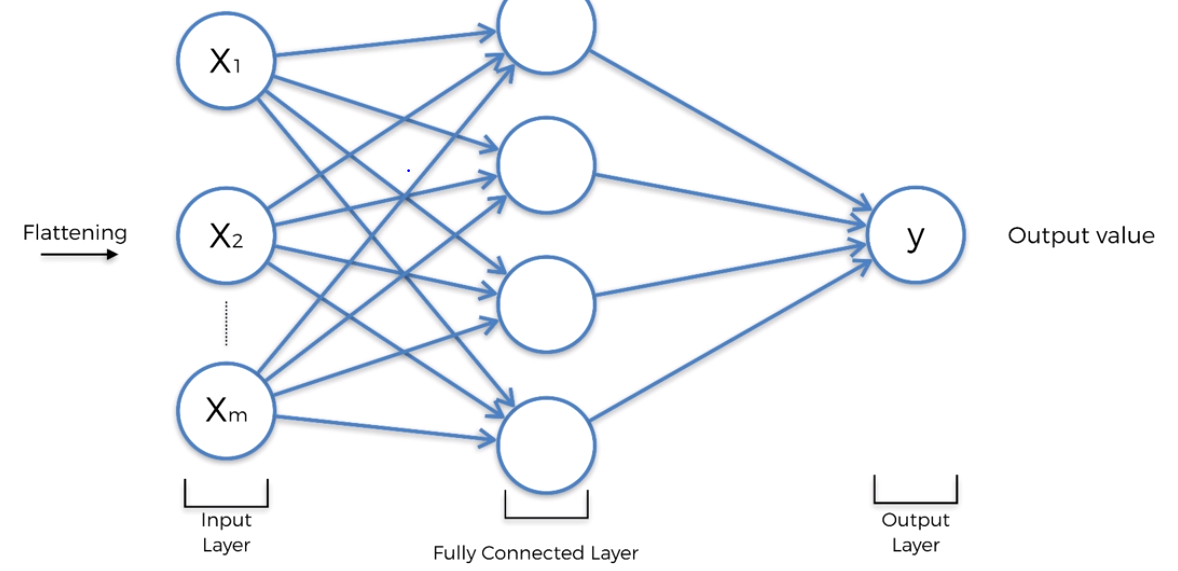

In [4]:
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

Since we have two sets of images cats and dogs thus the out probability would be P =n-1

Since their can be only one output possible

Thus we have used the activation function as sigmoid as our out is binary

In [27]:
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics= ['accuracy'])

Since our sets of inputs are binary as there can onlyu be 2 outcomes possible.

Thus the loss I have selected as binary_crossentropy. 

In [28]:
from keras.preprocessing.image import ImageDataGenerator

In [29]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

Arguments

featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.
samplewise_center: Boolean. Set each sample mean to 0.
featurewise_std_normalization: Boolean. Divide inputs by std of the dataset, feature-wise.
samplewise_std_normalization: Boolean. Divide each input by its std.
zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
zca_whitening: Boolean. Apply ZCA whitening.
rotation_range: Int. Degree range for random rotations.
width_shift_range: Float, 1-D array-like or int
float: fraction of total width, if < 1, or pixels if >= 1.
1-D array-like: random elements from the array.
int: integer number of pixels from interval  (-width_shift_range, +width_shift_range)
With width_shift_range=2 possible values are integers [-1, 0, +1], same as with  width_shift_range=[-1, 0, +1], while with width_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).
height_shift_range: Float, 1-D array-like or int
float: fraction of total height, if < 1, or pixels if >= 1.
1-D array-like: random elements from the array.
int: integer number of pixels from interval  (-height_shift_range, +height_shift_range)
With height_shift_range=2 possible values are integers [-1, 0, +1], same as with  height_shift_range=[-1, 0, +1], while with height_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).
shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
zoom_range: Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
channel_shift_range: Float. Range for random channel shifts.
fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode:
'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
'nearest': aaaaaaaa|abcd|dddddddd
'reflect': abcddcba|abcd|dcbaabcd
'wrap': abcdabcd|abcd|abcdabcd
cval: Float or Int. Value used for points outside the boundaries when fill_mode = "constant".
horizontal_flip: Boolean. Randomly flip inputs horizontally.
vertical_flip: Boolean. Randomly flip inputs vertically.
rescale: rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (before applying any other transformation).
preprocessing_function: function that will be implied on each input. The function will run after the image is resized and augmented. The function should take one argument: one image (Numpy tensor with rank 3), and should output a Numpy tensor with the same shape.
data_format: Image data format, either "channels_first" or "channels_last". "channels_last" mode means that the images should have shape  (samples, height, width, channels), "channels_first" mode means that the images should have shape (samples, channels, height, width). It defaults to the image_data_format value found in your Keras config file at  ~/.keras/keras.json. If you never set it, then it will be "channels_last".
validation_split: Float. Fraction of images reserved for validation (strictly between 0 and 1)

ImageDataGenerator is the function to augment the overall image

In [30]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
training_set = train_datagen.flow_from_directory(
        "C:/Users/Hemant/Desktop/Convolutional_Neural_Networks/Convolutional_Neural_Networks/dataset/training_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [32]:
training_set

In [33]:
test_set = test_datagen.flow_from_directory(
        'C:/Users/Hemant/Desktop/Convolutional_Neural_Networks/Convolutional_Neural_Networks/dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [34]:
test_set

Now we will crossverify the accuracy of our model.

In [ ]:
classifier.fit_generator(
        training_set,
        samples_per_epoch=8000,
        nb_epoch=25,
        validation_data=test_set,
        nb_val_samples=2000)

C:\Users\CHINMAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\CHINMAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=250, epochs=25, validation_steps=2000)`
  


Epoch 1/25
250/250 [==============================] - 1185s 5s/step - loss: 0.6942 - acc: 0.6040 - val_loss: 0.6013 - val_acc: 0.6674
Epoch 2/25
250/250 [==============================] - 1209s 5s/step - loss: 0.5852 - acc: 0.6931 - val_loss: 0.7345 - val_acc: 0.6079
Epoch 3/25
250/250 [==============================] - 1274s 5s/step - loss: 0.5663 - acc: 0.7069 - val_loss: 0.5821 - val_acc: 0.6895
Epoch 4/25
250/250 [==============================] - 1269s 5s/step - loss: 0.5447 - acc: 0.7171 - val_loss: 0.5382 - val_acc: 0.7379
Epoch 5/25
250/250 [==============================] - 1500s 6s/step - loss: 0.5211 - acc: 0.7375 - val_loss: 0.5552 - val_acc: 0.7264
Epoch 6/25
250/250 [==============================] - 1180s 5s/step - loss: 0.5087 - acc: 0.7515 - val_loss: 0.5157 - val_acc: 0.7526
Epoch 7/25
188/250 [=====================>........] - ETA: 56s - loss: 0.4940 - acc: 0.7613

In [ ]:

Conclusion : AS WE CAN SEE WE HAVE ACHIEVED THE ACCURACY ABOUT 75%.
             IN THIS PROJECT, WE HAVE GIVEN TWO TYPES OF ANIMALS CATS AND DOGS 
             WITH THE HELP OF MODEL WE HAVE PREDICTED AND CLASSIFIED THE ANIMAL INTO APPROPRIATE CATEGORY
             WITH TRAIL AND ERROR AND PROVIDING APPROPRIATE PARAMETERS TO THE MODEL WE HAVE ACHIEVED THE ACCURACY UPTO 75%
            